In [1]:
from predict import predict_vgg16

In [8]:
model_path = r'checkpoints/best.pth'  # 替换成你的.pth文件路径

output = predict_vgg16(checkpoint_path = model_path)

loading checkpoint [checkpoints/best.pth] successed!
loading state_dict successed!
checkpoint info: epoch = 115
model initialized on cuda
torch.Size([16, 1, 224, 224])
tensor([[0.5468, 1.2443, 0.0694,  ..., 0.8202, 1.9870, 0.0607],
        [0.5227, 1.1573, 0.0595,  ..., 0.2828, 1.2410, 0.0469],
        [0.5217, 1.1680, 0.0491,  ..., 0.4249, 1.5220, 0.0751],
        ...,
        [0.5907, 1.2690, 0.0842,  ..., 0.9817, 1.8042, 0.0221],
        [0.6540, 1.2472, 0.0730,  ..., 0.5738, 1.5582, 0.0691],
        [0.7896, 1.1258, 0.0572,  ..., 0.8156, 1.8255, 0.0427]],
       device='cuda:0')
torch.Size([16, 72])


In [9]:
print(output)

tensor([[0.5468, 1.2443, 0.0694,  ..., 0.8202, 1.9870, 0.0607],
        [0.5227, 1.1573, 0.0595,  ..., 0.2828, 1.2410, 0.0469],
        [0.5217, 1.1680, 0.0491,  ..., 0.4249, 1.5220, 0.0751],
        ...,
        [0.5907, 1.2690, 0.0842,  ..., 0.9817, 1.8042, 0.0221],
        [0.6540, 1.2472, 0.0730,  ..., 0.5738, 1.5582, 0.0691],
        [0.7896, 1.1258, 0.0572,  ..., 0.8156, 1.8255, 0.0427]],
       device='cuda:0')


In [10]:
output[0].reshape(24,3).cpu()

tensor([[0.5468, 1.2443, 0.0694],
        [0.5806, 1.1516, 0.0472],
        [0.4797, 1.1688, 0.0823],
        [0.5630, 1.3528, 0.0463],
        [0.6165, 0.8345, 0.2508],
        [0.3900, 0.8580, 0.2548],
        [0.5892, 1.4792, 0.0701],
        [0.5520, 0.5016, 0.0429],
        [0.3900, 0.5562, 0.0120],
        [0.6019, 1.5292, 0.0885],
        [0.5654, 0.3699, 0.0749],
        [0.3589, 0.4393, 0.0396],
        [0.6289, 1.7331, 0.0713],
        [0.6745, 1.6279, 0.0590],
        [0.5586, 1.6505, 0.0863],
        [0.6528, 1.8097, 0.1107],
        [0.7518, 1.6743, 0.0528],
        [0.5166, 1.7276, 0.0943],
        [0.8149, 1.8316, 0.0340],
        [0.6190, 1.8680, 0.1006],
        [0.7567, 1.9375, 0.0467],
        [0.7700, 1.9568, 0.0701],
        [0.7363, 1.9682, 0.0513],
        [0.8202, 1.9870, 0.0607]])

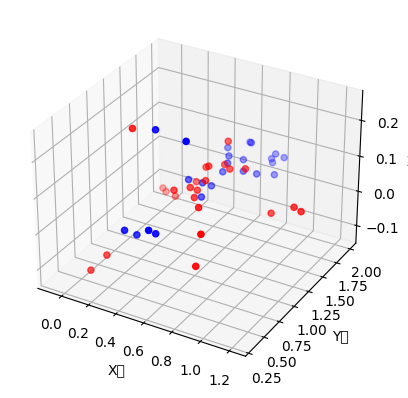

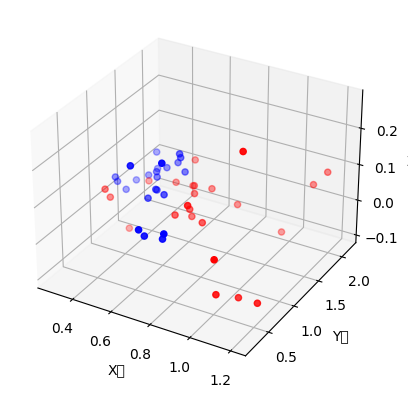

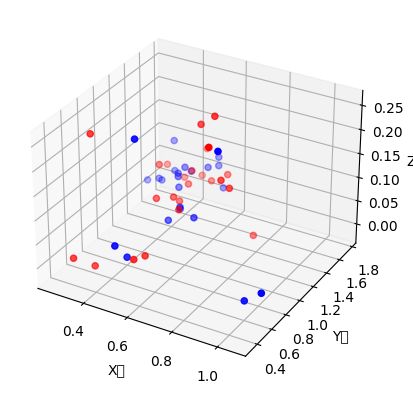

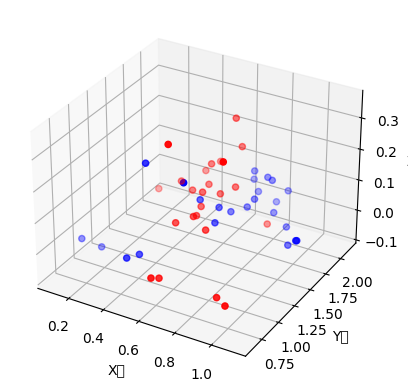

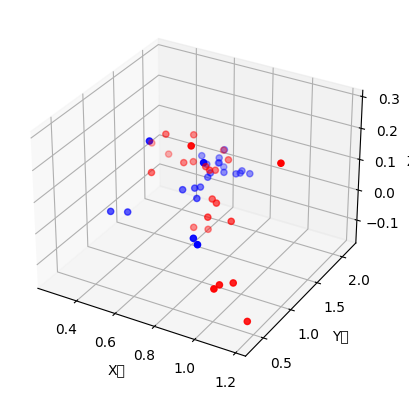

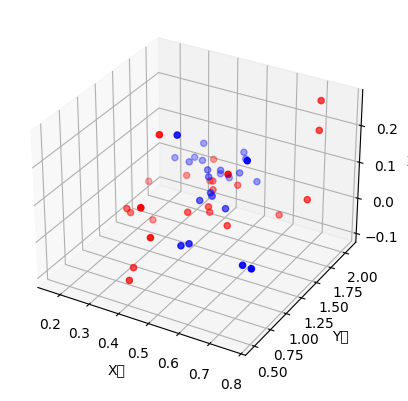

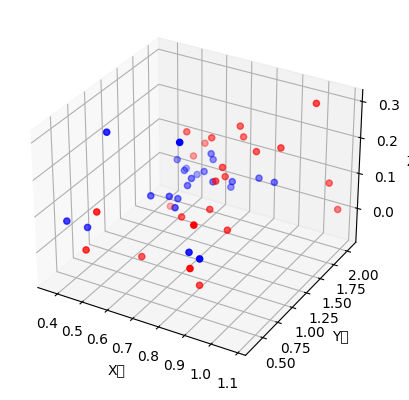

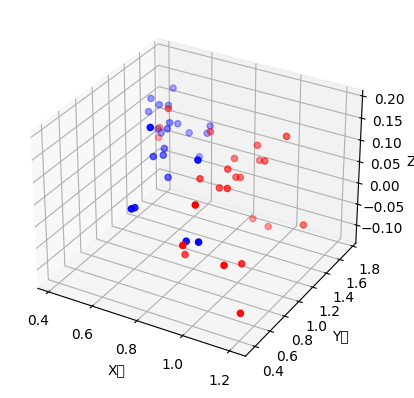

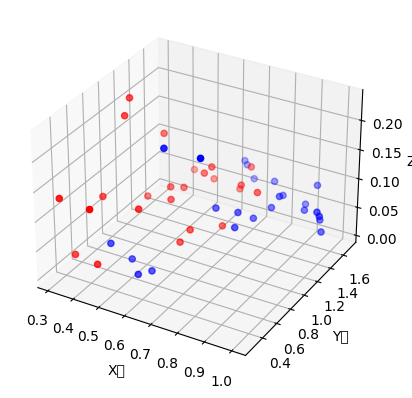

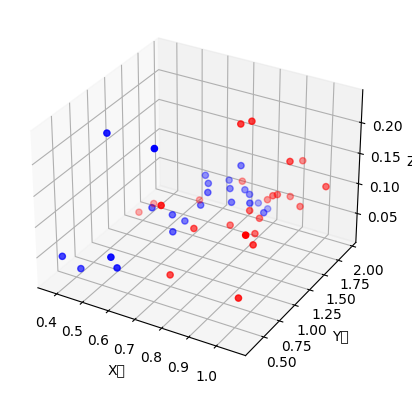

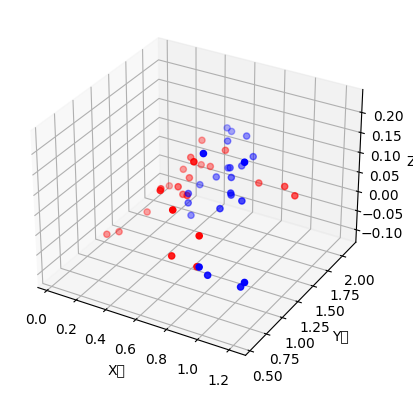

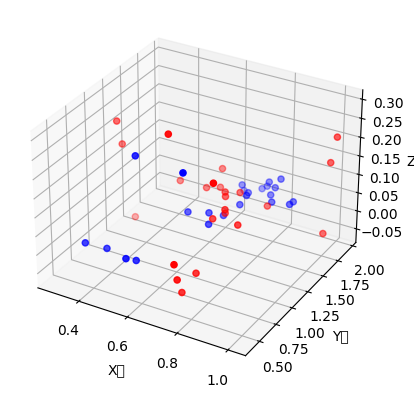

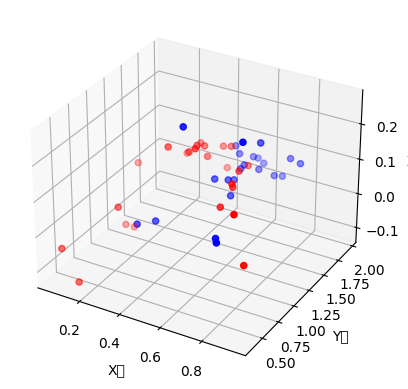

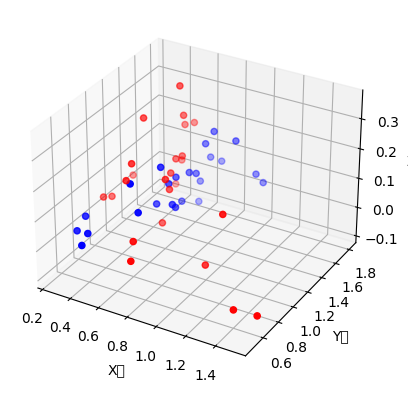

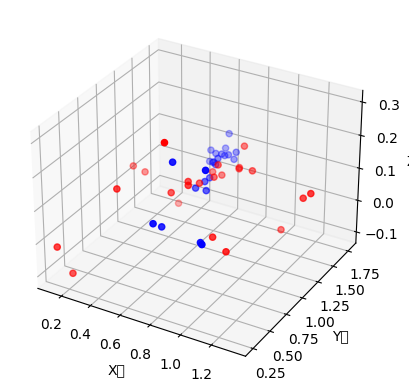

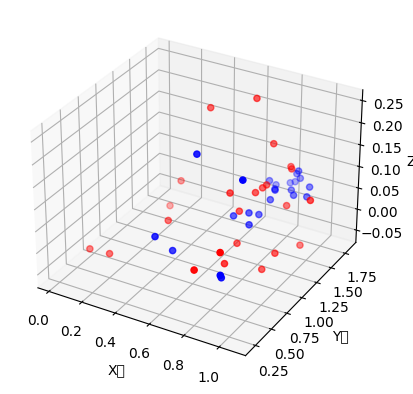

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具
import scipy.io


for i in range(0,len(output[:])):
    # 假设你的.mat文件在指定的目录中
    mat_file_path = f"predict_folder/{i}.mat"
    mat_data = scipy.io.loadmat(mat_file_path)
    mat_nodes_3d = mat_data['3D_skeleton_annotation']
    # 读取.mat文件的数据
    mat_data = scipy.io.loadmat(mat_file_path)

    # 创建示例的(24, 3)的张量，代表24个三维关节点的坐标
    nodes_3d = output[i].reshape(24,3).cpu()

    # 创建一个3D图形对象
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取X、Y和Z坐标
    x = nodes_3d[:, 0]
    y = nodes_3d[:, 1]
    z = nodes_3d[:, 2]

    # 绘制关节点
    ax.scatter(x, y, z, c='b', marker='o')
    ax.scatter(mat_nodes_3d[:, 0], mat_nodes_3d[:, 1], mat_nodes_3d[:, 2], c='r', marker='o', label='.mat Data')

    # 设置坐标轴标签
    ax.set_xlabel('X轴')
    ax.set_ylabel('Y轴')
    ax.set_zlabel('Z轴')

    # 显示图形
    plt.show()


In [18]:
mat_file_path = "predict_folder/0.mat"
mat_data = scipy.io.loadmat(mat_file_path)

In [23]:
import open3d as o3d

nodes_3d = mat_data['3D_skeleton_annotation']

# 创建一个Open3D点云对象
pcd = o3d.geometry.PointCloud()

# 设置点云数据
pcd.points = o3d.utility.Vector3dVector(nodes_3d)

# 创建可视化窗口
o3d.visualization.draw_geometries([pcd])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [26]:
nodes_3d = output[2].reshape(24,3).cpu()

# 创建一个Open3D点云对象
pcd = o3d.geometry.PointCloud()

# 设置点云数据
pcd.points = o3d.utility.Vector3dVector(nodes_3d)

# 创建可视化窗口
o3d.visualization.draw_geometries([pcd])